In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Data file as variable
stroke_predictive_path = "data/healthcare-dataset-stroke-data.csv"

In [2]:
# Read .csv file
stroke_predictive_df = pd.read_csv(stroke_predictive_path)

# Display preview of data
stroke_predictive_df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# Find number of individual participants
stroke_predictive_df["id"].nunique()
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Change columns to all lower case to match
stroke_predictive_df = stroke_predictive_df.rename(columns=str.lower)
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Check of dublicate IDs
# None found
duplicate_check = stroke_predictive_df.drop_duplicates(subset=["id"])
print(len(duplicate_check))

5110


In [6]:
# Check if any columns should be dropped
# All look appropriate, but bmi has 111 fewer rows of data
stroke_predictive_df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [7]:
# Drop rows with missing data so all match bmi's total
stroke_predictive = stroke_predictive_df.dropna(how='any')
stroke_predictive.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [8]:
# 895 subjects are minors 18 and under
# 574 subjects are children 12 and under
# 953 subjects are sections 65 and over

minor_check = stroke_predictive[stroke_predictive.age <= 18]
senior_check = stroke_predictive[stroke_predictive.age >= 65]
child_check = stroke_predictive[stroke_predictive.age <= 12]
print(minor_check["id"].nunique(), 
      child_check["id"].nunique(), 
      senior_check["id"].nunique())

895 574 953


In [9]:
# Unique entries for column work_type (5)
# Clean
stroke_predictive["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
# Unique entries for column ever_married (2)
# Clean
stroke_predictive["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
# Unique entries for column residence_type (2)
# Clean
stroke_predictive["residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
# Unique entries for column smoking_status (4)
# Clean
stroke_predictive["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

# What is the relationship between BMI and stroke occurrence?

In [13]:
# Establish the bins for bmi
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III']

In [14]:
# Creating a copy of the stroke prediction for later aggregations
stroke_patients_df = stroke_predictive.copy()

In [15]:
#Getting only the columns where there is a stroke
stroke_patients_df = stroke_patients_df[stroke_patients_df["stroke"] ==1]

In [16]:
# Add a BMI category column
stroke_patients_df['bmi_category'] = pd.cut(stroke_patients_df['bmi'], bmi_bins, labels=bmi_labels, include_lowest=True)
stroke_patients_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese Class II
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese Class I
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese Class I
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Overweight


In [17]:
# Grouping by BMI category
bmi_stroke_group = stroke_patients_df.groupby('bmi_category').size()
bmi_stroke_group

bmi_category
Underweight         1
Normal             35
Overweight         75
Obese Class I      56
Obese Class II     23
Obese Class III    19
dtype: int64

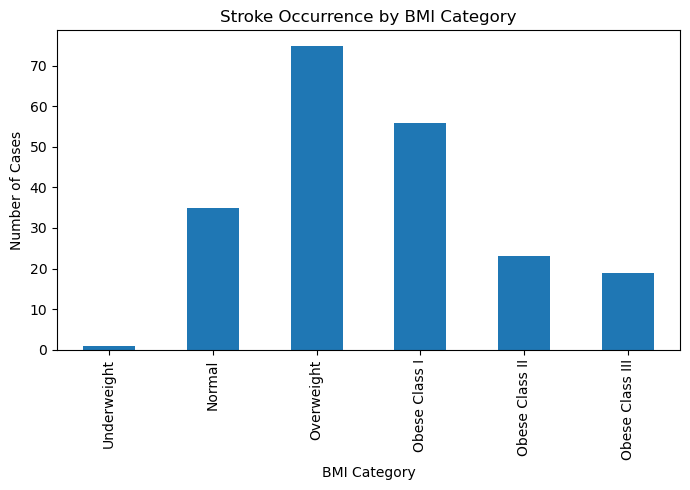

In [18]:
# Plot bar chart
bmi_stroke_group.plot(kind='bar', figsize=(7,5))

#Giving the chart some labels
plt.title('Stroke Occurrence by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Cases')

#Adjusting the layout of the plot to ensure proper spacing of elements
plt.tight_layout()

# Saving the figure
plt.savefig("data/Stroke Occurrence by BMI Category.png")

#Displaying the chart
plt.show()


There is a relationship between the BMI category and the Stroke occurrence. The "Underweight" BMI category shows the lowest number of stroke occurrences. The "Overweight" BMI category has the highest number of stroke occurrences, indicating in this category may be more prone to stroke than other BMI categories. However, the "Obese Class I II and III" show fewer stroke occurrences than the "Overweight" which may seem counterintuitive. This could suggest that BMI alone may not fully explain the stroke risk.   

In [19]:
# Group by gender and BMI category
#Used this link to get be able to get use the unstack function https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
bmi_gender_group = stroke_patients_df.groupby(['bmi_category', 'gender']).size().unstack(fill_value=0)
bmi_gender_group

gender,Female,Male
bmi_category,,
Underweight,1,0
Normal,26,9
Overweight,40,35
Obese Class I,29,27
Obese Class II,12,11
Obese Class III,12,7


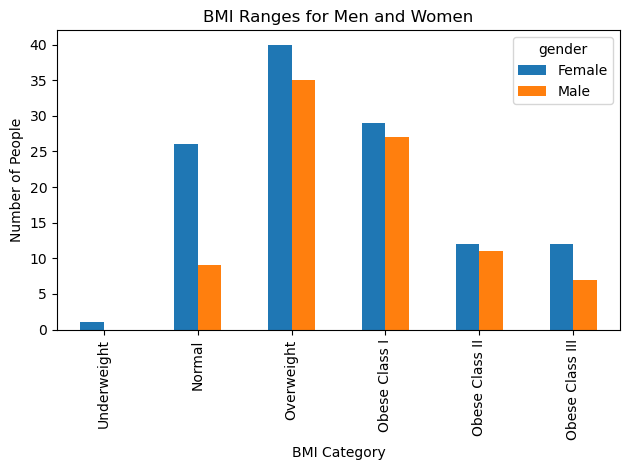

In [20]:
# Plot stacked bar chart
bmi_gender_group.plot(kind='bar')

#Giving the chart some labels
plt.title('BMI Ranges for Men and Women')
plt.xlabel('BMI Category')
plt.ylabel('Number of People')

#Adjusting the layout of the plot to ensure proper spacing of elements
plt.tight_layout()

# Saving the figure
plt.savefig("data/BMI Ranges for Men and Women.png")

#Displaying the chart
plt.show()

This chart shows a greater percentage of women are categorized as either "Overweight" or "Obese Class I" compared to men. Therefore, the data suggests that women may be at higher risk of being overweight compared to men. Overall, this chart shows how the distribution of BMI categories changes by gender, which may be useful in understanding the variations in health risk factors between men and women. 

In [21]:
# Establish the bins for age
age_bins = [40, 50, 60, 70, 80, 90]  # Define age ranges
age_labels = ['40-50', '50-60', '60-70', '70-80', '80-90']  # Label each range

In [22]:
# Adding a age group column
stroke_patients_df['age_group'] = pd.cut(stroke_patients_df['age'], bins=age_bins, labels=age_labels)


In [23]:
# Calculating average BMI for each age group
stroke_avg_bmi_by_age = stroke_patients_df.groupby('age_group')['bmi'].mean()
stroke_avg_bmi_by_age

age_group
40-50    33.226667
50-60    33.142857
60-70    32.216667
70-80    28.754321
80-90    26.782609
Name: bmi, dtype: float64

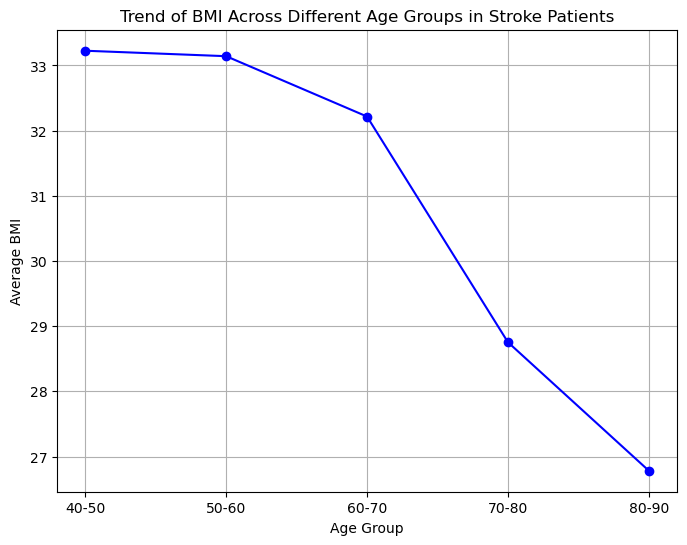

In [24]:
#Creating the figure for the line plot with a specific size
plt.figure(figsize=(8,6))

# Plotting the line charts for the stroke and no stroke data
plt.plot(stroke_avg_bmi_by_age.index, stroke_avg_bmi_by_age.values, marker='o', linestyle='-', color='blue', label='Stroke')

#Giving the chart some labels
plt.title('Trend of BMI Across Different Age Groups in Stroke Patients')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')

# Adding grid lines to the chart
plt.grid(True)

# Saving the figure
plt.savefig("data/Trend of BMI Across Different Age Groups in Stroke Patients.png")

#Displaying the chart
plt.show()

There is an inverse relationship which shows a downward trend in BMI as age increases. For the 40-50 age group the average BMI is around 33, but by the 80-90 age group it drops to around 27. So older stroke patients tend to have a significantly lower BMI compared to younger patients. Therefore, this suggests that variables such as health related changes or the BMI (may be in the underweight or normal categories) in older age may lead to reduced BMI in stroke patients.

# How do glucose levels vary across patients with stroke?

In [25]:
stroke_patients_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese Class II,60-70
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese Class I,70-80
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese Class I,40-50
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal,70-80
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Overweight,80-90


In [26]:
# Calculate average glucose levels for each age group (stroke patients)
age_group_avg_stroke = stroke_patients_df.groupby('age_group')['avg_glucose_level'].mean()
age_group_avg_stroke

age_group
40-50    107.465333
50-60    129.956905
60-70    149.764524
70-80    140.119012
80-90    128.698696
Name: avg_glucose_level, dtype: float64

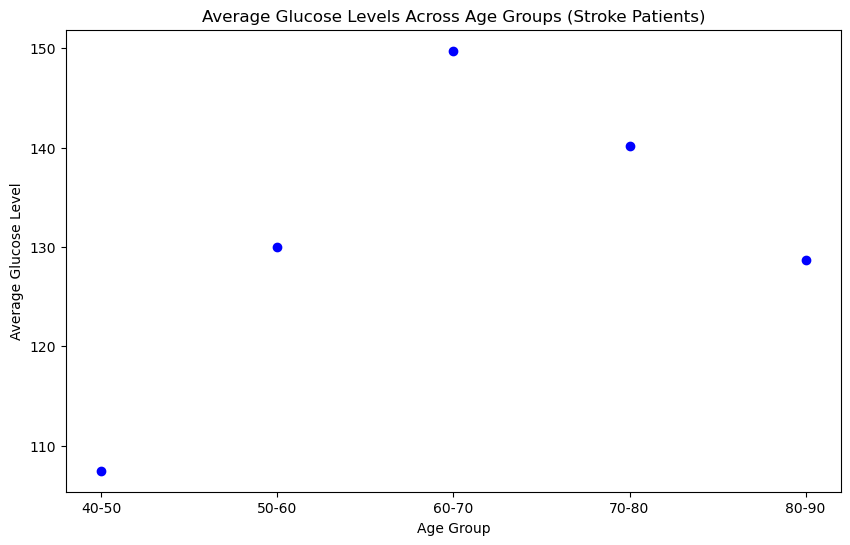

In [27]:
#Creating the figure for the line plot with a specific size
plt.figure(figsize=(10,6))

# Scatter plot for stroke patients
plt.scatter(age_group_avg_stroke.index, age_group_avg_stroke.values, color='blue', label='Stroke')

#Giving the chart some labels
plt.title('Average Glucose Levels Across Age Groups (Stroke Patients)')
plt.xlabel('Age Group')
plt.ylabel('Average Glucose Level')

# Saving the figure
plt.savefig("data/Average Glucose Levels Across Age Groups (Stroke Patients).png")

# Show the plot
plt.show()

There is a general pattern of rising average glucose levels with age in stroke patients, with a peak in the 70-50 age range. After this age range, glucose levels appear to drop significantly. This might suggest that older stroke patients had higher glucose levels, however it decreases somewhat for the older group. The decrease in older group could be due to having a strict lifestyle change like diet or medication adherence.

In [28]:
# Stroke categories
stroke_categories = [1]  # 1 = Stroke
glucose_levels = []

# Calculate IQR and potential outliers for each stroke group
for stroke in stroke_categories:
    
    # Locate the rows which contain individuals with and without strokes and get avg glucose levels
    stroke_data = stroke_predictive[stroke_predictive['stroke'] == stroke]['avg_glucose_level']
    
    # Add glucose levels to the list (for plotting)
    glucose_levels.append(stroke_data)
    
    # Calculate quartiles and IQR
    quartiles = stroke_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = stroke_data[(stroke_data < lower_bound) | (stroke_data > upper_bound)]
    
    # Print the outliers
    print(f"Stroke potential outliers: {outliers}")

Stroke potential outliers: Series([], Name: avg_glucose_level, dtype: float64)


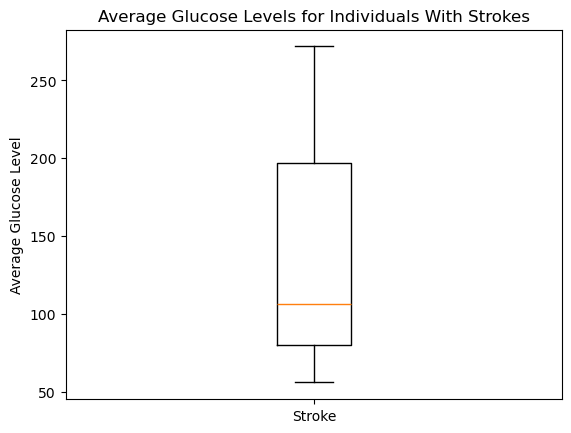

In [29]:
#Creating a figure and axis for the box plot using subplots
fig, ax = plt.subplots()

#Generating the box plot for the glucose levels data for the stroke occurance
bp = ax.boxplot(glucose_levels,labels=stroke_categories)

#Customize plot
ax.set_title('Average Glucose Levels for Individuals With Strokes')
ax.set_ylabel('Average Glucose Level')
ax.set_xticklabels(['Stroke'])

#Customizing the appearance of the outliers (fliers) in the box plot
plt.setp(bp['fliers'], marker='o', markerfacecolor='r', markersize=4, linestyle='none')

# Saving the figure
plt.savefig("data/Average Glucose Levels for Individuals With Strokes.png")

#Displaying the box plot chart
plt.show()


The range of glucose levels in stroke patients is highly diverse, with central tendency of approximately 100. However, some people's glucose levels might range from 60 to 250. This implies that glucose levels vary greatly in stroke patients, with having raised glucose levels, which might indicate a link between higher glucose levels and stroke occurrences. The large range may also reflect other variables, such as underlying diabetes, or differing level of glucose control among individuals.